# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
import os
# Import the OpenWeatherMap API key set up as system environment variable
weather_key = os.getenv("weather_api_key")
geoapi_key = os.getenv("geoapify_key")

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
import scipy.stats as st 

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

C:\Users\bijoy\anaconda3\envs\pyMaps\lib\site-packages\requests\__init__.py:109: RequestsDependencyWarning: urllib3 (1.26.15) or chardet (None)/charset_normalizer (3.1.0) doesn't match a supported version!
  warnings.warn(


### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 627


In [4]:
#checking cities
cities

['amboise',
 'powassan',
 'bajil',
 'coihaique',
 'hermanus',
 'busselton',
 'kodiak',
 'butaritari',
 'airai',
 'taltal',
 'avarua',
 'kieta',
 'vaini',
 'bengkulu',
 'uvat',
 'severo-kurilsk',
 'nome',
 'punta arenas',
 'carnarvon',
 'ribeira grande',
 'vilyuysk',
 'mogadishu',
 'geraldton',
 'bethel',
 'rikitea',
 'tomatlan',
 'svetlogorsk',
 'bluff',
 'victoria',
 'fortuna',
 'alto longa',
 'rocha',
 'atuona',
 'tiksi',
 'odienne',
 'castro',
 'georgetown',
 'kruisfontein',
 'namatanai',
 'ushuaia',
 'tual',
 'lebu',
 'ixtapa',
 'greenlaw',
 'ahipara',
 'marzuq',
 'mar del plata',
 'boyolangu',
 'barentsburg',
 'joacaba',
 'mitsamiouli',
 'tabou',
 'narsaq',
 'tongchuan',
 'kaitangata',
 'port hardy',
 'souillac',
 'haibowan',
 'atambua',
 'dzhebariki-khaya',
 'port alfred',
 'zhemchuzhnyy',
 'arraial do cabo',
 'taolanaro',
 'derzhavinsk',
 'mataura',
 'cape town',
 'ovsyanka',
 'faanui',
 'cherskiy',
 'amderma',
 'nemuro',
 'port blair',
 'hamilton',
 'stara vyzhivka',
 'dikson',

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
#Test for API call and sample response data
base_url = "http://api.openweathermap.org/data/2.5/weather"
params = {"q":"London,uk","APPID":weather_key}
response = requests.get(url = base_url,params = params)
print(response.text)
response = response.json()
file_name = "json_output.json"

#writing API response into an output json file to view in vscode
with open(file_name, "w") as filehandler:
    json.dump(response,filehandler,indent =4)

{"coord":{"lon":-0.1257,"lat":51.5085},"weather":[{"id":803,"main":"Clouds","description":"broken clouds","icon":"04d"}],"base":"stations","main":{"temp":285.08,"feels_like":283.58,"temp_min":282.75,"temp_max":286.09,"pressure":1002,"humidity":48},"visibility":10000,"wind":{"speed":6.69,"deg":260},"clouds":{"all":64},"dt":1681404209,"sys":{"type":2,"id":2075535,"country":"GB","sunrise":1681362586,"sunset":1681411923},"timezone":3600,"id":2643743,"name":"London","cod":200}


In [6]:
# Define an empty list to fetch the weather data for each city
city_data = []
units = "metric"

# Print to logger
print("Beginning Weather Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
   
    #set parameters with each city for the url to call Open Weather Map API 
    params= {"q":city,"APPID":weather_key,"units":units}
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    
      # Run an API request for each of the cities   
        
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(base_url,params=params)
        print(city_weather.text)
        
        city_weather = city_weather.json()
                
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather.get("coord").get("lat") if city_weather.get("coord") else None
        city_lng = city_weather.get("coord").get("lon") if city_weather.get("coord") else None
        city_max_temp = city_weather.get("main").get("temp_max") if city_weather.get("main") else None
        city_humidity = city_weather.get("main").get("humidity") if city_weather.get("main") else None
        city_clouds = city_weather.get("clouds").get("all") if city_weather.get("clouds") else None
        city_wind = city_weather.get("wind").get("speed") if city_weather.get("wind") else None
        city_country = city_weather.get("sys").get("country") if city_weather.get("sys") else None
        city_date = city_weather.get("dt")
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
  
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Weather Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | amboise
{"coord":{"lon":0.9827,"lat":47.4125},"weather":[{"id":804,"main":"Clouds","description":"overcast clouds","icon":"04d"}],"base":"stations","main":{"temp":9.38,"feels_like":6.76,"temp_min":8.83,"temp_max":10.3,"pressure":1009,"humidity":76},"visibility":10000,"wind":{"speed":5.14,"deg":250},"clouds":{"all":100},"dt":1681404494,"sys":{"type":2,"id":2001328,"country":"FR","sunrise":1681362722,"sunset":1681411255},"timezone":7200,"id":3037902,"name":"Amboise","cod":200}
Processing Record 2 of Set 1 | powassan
{"coord":{"lon":-79.3496,"lat":46.0334},"weather":[{"id":800,"main":"Clear","description":"clear sky","icon":"01d"}],"base":"stations","main":{"temp":22.09,"feels_like":22.21,"temp_min":14.48,"temp_max":22.09,"pressure":1007,"humidity":71,"sea_level":1007,"grnd_level":974},"visibility":10000,"wind":{"speed":3.94,"deg":254,"gust":6.77},"clouds":{"all":7},"dt":1681404494,"sys":{"t

{"coord":{"lon":-165.4064,"lat":64.5011},"weather":[{"id":800,"main":"Clear","description":"clear sky","icon":"01d"}],"base":"stations","main":{"temp":-27.96,"feels_like":-27.96,"temp_min":-27.96,"temp_max":-26.02,"pressure":1018,"humidity":91},"visibility":10000,"wind":{"speed":0,"deg":0},"clouds":{"all":0},"dt":1681404397,"sys":{"type":1,"id":7770,"country":"US","sunrise":1681400103,"sunset":1681453726},"timezone":-28800,"id":5870133,"name":"Nome","cod":200}
Processing Record 18 of Set 1 | punta arenas
{"coord":{"lon":-70.9167,"lat":-53.15},"weather":[{"id":801,"main":"Clouds","description":"few clouds","icon":"02d"}],"base":"stations","main":{"temp":5.85,"feels_like":3.14,"temp_min":5.62,"temp_max":7.01,"pressure":1019,"humidity":70},"visibility":10000,"wind":{"speed":3.6,"deg":70},"clouds":{"all":20},"dt":1681404499,"sys":{"type":1,"id":8487,"country":"CL","sunrise":1681385228,"sunset":1681423254},"timezone":-10800,"id":3874787,"name":"Punta Arenas","cod":200}
Processing Record 19 

{"coord":{"lon":-139.0333,"lat":-9.8},"weather":[{"id":803,"main":"Clouds","description":"broken clouds","icon":"04d"}],"base":"stations","main":{"temp":26.81,"feels_like":28.47,"temp_min":26.81,"temp_max":26.81,"pressure":1012,"humidity":69,"sea_level":1012,"grnd_level":1004},"visibility":10000,"wind":{"speed":3.19,"deg":10,"gust":3.17},"clouds":{"all":58},"dt":1681404309,"sys":{"country":"PF","sunrise":1681399161,"sunset":1681442012},"timezone":-34200,"id":4020109,"name":"Atuona","cod":200}
Processing Record 34 of Set 1 | tiksi
{"coord":{"lon":128.8694,"lat":71.6872},"weather":[{"id":804,"main":"Clouds","description":"overcast clouds","icon":"04n"}],"base":"stations","main":{"temp":-16.77,"feels_like":-21.93,"temp_min":-16.77,"temp_max":-16.77,"pressure":1021,"humidity":89,"sea_level":1021,"grnd_level":1015},"visibility":10000,"wind":{"speed":1.97,"deg":228,"gust":1.98},"clouds":{"all":100},"dt":1681404504,"sys":{"country":"RU","sunrise":1681413334,"sunset":1681472038},"timezone":324

{"cod":"404","message":"city not found"}
Processing Record 50 of Set 1 | joacaba
{"coord":{"lon":-51.5047,"lat":-27.1781},"weather":[{"id":801,"main":"Clouds","description":"few clouds","icon":"02d"}],"base":"stations","main":{"temp":28.77,"feels_like":27.99,"temp_min":28.77,"temp_max":28.77,"pressure":1009,"humidity":35,"sea_level":1009,"grnd_level":949},"visibility":10000,"wind":{"speed":1.83,"deg":206,"gust":3.3},"clouds":{"all":20},"dt":1681404511,"sys":{"country":"BR","sunrise":1681378874,"sunset":1681420293},"timezone":-10800,"id":3459869,"name":"Joaçaba","cod":200}
Processing Record 0 of Set 2 | mitsamiouli
{"coord":{"lon":43.2844,"lat":-11.3847},"weather":[{"id":802,"main":"Clouds","description":"scattered clouds","icon":"03n"}],"base":"stations","main":{"temp":27.48,"feels_like":30.25,"temp_min":27.48,"temp_max":27.48,"pressure":1013,"humidity":75,"sea_level":1013,"grnd_level":1013},"visibility":10000,"wind":{"speed":3.37,"deg":122,"gust":3.58},"clouds":{"all":31},"dt":1681404

{"coord":{"lon":92.5519,"lat":55.9575},"weather":[{"id":804,"main":"Clouds","description":"overcast clouds","icon":"04n"}],"base":"stations","main":{"temp":3.54,"feels_like":-0.29,"temp_min":3.54,"temp_max":3.54,"pressure":1013,"humidity":90,"sea_level":1013,"grnd_level":989},"visibility":10000,"wind":{"speed":4.61,"deg":236,"gust":11.1},"clouds":{"all":97},"dt":1681404516,"sys":{"type":1,"id":8957,"country":"RU","sunrise":1681339850,"sunset":1681390182},"timezone":25200,"id":1495797,"name":"Ovsyanka","cod":200}
Processing Record 18 of Set 2 | faanui
{"coord":{"lon":-151.75,"lat":-16.4833},"weather":[{"id":801,"main":"Clouds","description":"few clouds","icon":"02d"}],"base":"stations","main":{"temp":27.32,"feels_like":29.71,"temp_min":27.32,"temp_max":27.32,"pressure":1011,"humidity":73,"sea_level":1011,"grnd_level":1011},"visibility":10000,"wind":{"speed":6.45,"deg":120,"gust":6.59},"clouds":{"all":16},"dt":1681404516,"sys":{"country":"PF","sunrise":1681402478,"sunset":1681444797},"ti

{"coord":{"lon":56.9244,"lat":33.5959},"weather":[{"id":804,"main":"Clouds","description":"overcast clouds","icon":"04n"}],"base":"stations","main":{"temp":29.82,"feels_like":28.09,"temp_min":29.82,"temp_max":29.82,"pressure":1006,"humidity":20,"sea_level":1006,"grnd_level":934},"visibility":10000,"wind":{"speed":7.21,"deg":200,"gust":12.39},"clouds":{"all":100},"dt":1681404520,"sys":{"country":"IR","sunrise":1681350292,"sunset":1681396838},"timezone":12600,"id":113659,"name":"Tabas","cod":200}
Processing Record 37 of Set 2 | qaanaaq
{"coord":{"lon":-69.3632,"lat":77.484},"weather":[{"id":800,"main":"Clear","description":"clear sky","icon":"01d"}],"base":"stations","main":{"temp":-12.31,"feels_like":-12.31,"temp_min":-12.31,"temp_max":-12.31,"pressure":1014,"humidity":82,"sea_level":1014,"grnd_level":1009},"visibility":10000,"wind":{"speed":1.06,"deg":61,"gust":1.21},"clouds":{"all":1},"dt":1681404520,"sys":{"country":"GL","sunrise":1681369931,"sunset":1681437806},"timezone":-10800,"id

{"coord":{"lon":-52.3333,"lat":4.9333},"weather":[{"id":501,"main":"Rain","description":"moderate rain","icon":"10d"}],"base":"stations","main":{"temp":25.02,"feels_like":26.03,"temp_min":25.02,"temp_max":25.02,"pressure":1010,"humidity":94},"visibility":10000,"wind":{"speed":1.03,"deg":0},"rain":{"1h":2.37},"clouds":{"all":75},"dt":1681404524,"sys":{"type":1,"id":8669,"country":"GF","sunrise":1681377792,"sunset":1681421772},"timezone":-10800,"id":3382160,"name":"Cayenne","cod":200}
Processing Record 5 of Set 3 | takoradi
{"coord":{"lon":-1.7554,"lat":4.8845},"weather":[{"id":801,"main":"Clouds","description":"few clouds","icon":"02d"}],"base":"stations","main":{"temp":29.11,"feels_like":33.36,"temp_min":29.11,"temp_max":29.11,"pressure":1006,"humidity":72,"sea_level":1006,"grnd_level":1004},"visibility":10000,"wind":{"speed":5.93,"deg":208,"gust":6.58},"clouds":{"all":19},"dt":1681404524,"sys":{"country":"GH","sunrise":1681365658,"sunset":1681409633},"timezone":0,"id":2294915,"name":"

{"coord":{"lon":-97.8558,"lat":55.7435},"weather":[{"id":804,"main":"Clouds","description":"overcast clouds","icon":"04d"}],"base":"stations","main":{"temp":0.09,"feels_like":0.09,"temp_min":0.09,"temp_max":0.09,"pressure":1012,"humidity":80},"visibility":10000,"wind":{"speed":0,"deg":0},"clouds":{"all":100},"dt":1681404528,"sys":{"type":1,"id":935,"country":"CA","sunrise":1681385496,"sunset":1681435915},"timezone":-18000,"id":6165406,"name":"Thompson","cod":200}
Processing Record 23 of Set 3 | hovd
{"coord":{"lon":91.6419,"lat":48.0056},"weather":[{"id":801,"main":"Clouds","description":"few clouds","icon":"02n"}],"base":"stations","main":{"temp":0.5,"feels_like":0.5,"temp_min":0.5,"temp_max":0.5,"pressure":1022,"humidity":29,"sea_level":1022,"grnd_level":861},"visibility":10000,"wind":{"speed":1.3,"deg":185,"gust":1.4},"clouds":{"all":23},"dt":1681404528,"sys":{"country":"MN","sunrise":1681340939,"sunset":1681389529},"timezone":25200,"id":1516048,"name":"Khovd","cod":200}
Processing 

{"coord":{"lon":34.8389,"lat":-19.8436},"weather":[{"id":801,"main":"Clouds","description":"few clouds","icon":"02n"}],"base":"stations","main":{"temp":25.61,"feels_like":26.39,"temp_min":25.61,"temp_max":26.05,"pressure":1012,"humidity":83},"visibility":10000,"wind":{"speed":3.13,"deg":130,"gust":0},"clouds":{"all":20},"dt":1681404532,"sys":{"type":2,"id":131550,"country":"MZ","sunrise":1681357827,"sunset":1681399902},"timezone":7200,"id":1052373,"name":"Beira","cod":200}
Processing Record 42 of Set 3 | khowst
{"coord":{"lon":69.8833,"lat":33.3833},"weather":[{"id":800,"main":"Clear","description":"clear sky","icon":"01n"}],"base":"stations","main":{"temp":21.73,"feels_like":21.03,"temp_min":21.73,"temp_max":21.73,"pressure":1014,"humidity":41,"sea_level":1014,"grnd_level":875},"visibility":10000,"wind":{"speed":0.72,"deg":280,"gust":1.07},"clouds":{"all":1},"dt":1681404532,"sys":{"country":"AF","sunrise":1681347197,"sunset":1681393714},"timezone":16200,"id":1444362,"name":"Khowst","c

{"coord":{"lon":137.7667,"lat":-32.5},"weather":[{"id":800,"main":"Clear","description":"clear sky","icon":"01n"}],"base":"stations","main":{"temp":15.05,"feels_like":14.15,"temp_min":15.05,"temp_max":15.05,"pressure":1012,"humidity":59,"sea_level":1012,"grnd_level":1012},"visibility":10000,"wind":{"speed":2.22,"deg":67,"gust":2.23},"clouds":{"all":4},"dt":1681404535,"sys":{"country":"AU","sunrise":1681420125,"sunset":1681460976},"timezone":34200,"id":2063056,"name":"Port Augusta","cod":200}
Processing Record 8 of Set 4 | kaabong
{"coord":{"lon":34.1492,"lat":3.4836},"weather":[{"id":804,"main":"Clouds","description":"overcast clouds","icon":"04n"}],"base":"stations","main":{"temp":22.94,"feels_like":22.65,"temp_min":22.94,"temp_max":22.94,"pressure":1011,"humidity":52,"sea_level":1011,"grnd_level":852},"visibility":10000,"wind":{"speed":5.9,"deg":87,"gust":10.4},"clouds":{"all":96},"dt":1681404536,"sys":{"country":"UG","sunrise":1681357097,"sunset":1681400963},"timezone":10800,"id":23

{"coord":{"lon":81.9833,"lat":27.3833},"weather":[{"id":803,"main":"Clouds","description":"broken clouds","icon":"04n"}],"base":"stations","main":{"temp":30.23,"feels_like":28.31,"temp_min":30.23,"temp_max":30.23,"pressure":1007,"humidity":13,"sea_level":1007,"grnd_level":994},"visibility":10000,"wind":{"speed":3.03,"deg":278,"gust":3.3},"clouds":{"all":52},"dt":1681404539,"sys":{"country":"IN","sunrise":1681344613,"sunset":1681390490},"timezone":19800,"id":1266926,"name":"Khargupur","cod":200}
Processing Record 24 of Set 4 | daman
{"coord":{"lon":72.85,"lat":20.4167},"weather":[{"id":804,"main":"Clouds","description":"overcast clouds","icon":"04n"}],"base":"stations","main":{"temp":28.37,"feels_like":32.03,"temp_min":28.37,"temp_max":28.37,"pressure":1012,"humidity":74,"sea_level":1012,"grnd_level":1011},"visibility":10000,"wind":{"speed":3.13,"deg":277,"gust":3.3},"clouds":{"all":100},"dt":1681404539,"sys":{"country":"IN","sunrise":1681347129,"sunset":1681392357},"timezone":19800,"id

{"coord":{"lon":93.45,"lat":42.8},"weather":[{"id":803,"main":"Clouds","description":"broken clouds","icon":"04n"}],"base":"stations","main":{"temp":12.49,"feels_like":10.45,"temp_min":12.49,"temp_max":12.49,"pressure":1022,"humidity":25,"sea_level":1022,"grnd_level":936},"visibility":10000,"wind":{"speed":0.91,"deg":340,"gust":1.25},"clouds":{"all":71},"dt":1681404543,"sys":{"country":"CN","sunrise":1681427235,"sunset":1681475135},"timezone":28800,"id":1529484,"name":"Kumul","cod":200}
Processing Record 40 of Set 4 | ossora
{"coord":{"lon":163.0719,"lat":59.2353},"weather":[{"id":600,"main":"Snow","description":"light snow","icon":"13n"}],"base":"stations","main":{"temp":-13.5,"feels_like":-18.05,"temp_min":-13.5,"temp_max":-13.5,"pressure":1029,"humidity":96,"sea_level":1029,"grnd_level":1029},"visibility":217,"wind":{"speed":1.93,"deg":332,"gust":1.8},"snow":{"1h":0.13},"clouds":{"all":92},"dt":1681404543,"sys":{"country":"RU","sunrise":1681408707,"sunset":1681460251},"timezone":432

{"coord":{"lon":32.7667,"lat":-5.6333},"weather":[{"id":500,"main":"Rain","description":"light rain","icon":"10n"}],"base":"stations","main":{"temp":20.14,"feels_like":20.56,"temp_min":20.14,"temp_max":20.14,"pressure":1011,"humidity":90,"sea_level":1011,"grnd_level":884},"visibility":10000,"wind":{"speed":2.23,"deg":117,"gust":3.8},"rain":{"1h":0.19},"clouds":{"all":100},"dt":1681404548,"sys":{"country":"TZ","sunrise":1681357771,"sunset":1681400952},"timezone":10800,"id":149929,"name":"Sikonge","cod":200}
Processing Record 6 of Set 5 | balagunan
{"coord":{"lon":125.5211,"lat":7.4922},"weather":[{"id":801,"main":"Clouds","description":"few clouds","icon":"02n"}],"base":"stations","main":{"temp":27.42,"feels_like":32.37,"temp_min":27.42,"temp_max":27.42,"pressure":1010,"humidity":93,"sea_level":1010,"grnd_level":998},"visibility":10000,"wind":{"speed":0.88,"deg":271,"gust":0.97},"clouds":{"all":15},"dt":1681404548,"sys":{"type":1,"id":8154,"country":"PH","sunrise":1681421394,"sunset":16

{"coord":{"lon":-56.3853,"lat":-34.7633},"weather":[{"id":802,"main":"Clouds","description":"scattered clouds","icon":"03d"}],"base":"stations","main":{"temp":18.17,"feels_like":17.4,"temp_min":17.16,"temp_max":18.23,"pressure":1018,"humidity":52},"visibility":10000,"wind":{"speed":4.12,"deg":210},"clouds":{"all":40},"dt":1681404552,"sys":{"type":1,"id":8687,"country":"UY","sunrise":1681380421,"sunset":1681421088},"timezone":-10800,"id":3442778,"name":"Delta del Tigre","cod":200}
Processing Record 23 of Set 5 | cidreira
{"coord":{"lon":-50.2056,"lat":-30.1811},"weather":[{"id":501,"main":"Rain","description":"moderate rain","icon":"10d"}],"base":"stations","main":{"temp":19.38,"feels_like":19.57,"temp_min":19.38,"temp_max":19.38,"pressure":1013,"humidity":84,"sea_level":1013,"grnd_level":1012},"visibility":10000,"wind":{"speed":3.4,"deg":208,"gust":5.27},"rain":{"1h":2.37},"clouds":{"all":100},"dt":1681404367,"sys":{"country":"BR","sunrise":1681378704,"sunset":1681419839},"timezone":-1

{"coord":{"lon":113.25,"lat":23.1167},"weather":[{"id":802,"main":"Clouds","description":"scattered clouds","icon":"03n"}],"base":"stations","main":{"temp":23.97,"feels_like":24.28,"temp_min":23.26,"temp_max":23.97,"pressure":1012,"humidity":71,"sea_level":1012,"grnd_level":1010},"visibility":10000,"wind":{"speed":3.1,"deg":172,"gust":4.89},"clouds":{"all":39},"dt":1681404330,"sys":{"type":1,"id":9620,"country":"CN","sunrise":1681423664,"sunset":1681469204},"timezone":28800,"id":1809858,"name":"Guangzhou","cod":200}
Processing Record 41 of Set 5 | leningradskiy
{"coord":{"lon":178.4167,"lat":69.3833},"weather":[{"id":803,"main":"Clouds","description":"broken clouds","icon":"04d"}],"base":"stations","main":{"temp":-26.46,"feels_like":-33.46,"temp_min":-26.46,"temp_max":-26.46,"pressure":1033,"humidity":98,"sea_level":1033,"grnd_level":1033},"visibility":6061,"wind":{"speed":2.54,"deg":237,"gust":2.28},"clouds":{"all":79},"dt":1681404557,"sys":{"country":"RU","sunrise":1681402495,"sunset

{"cod":"404","message":"city not found"}
Processing Record 8 of Set 6 | sorland
{"coord":{"lon":12.6934,"lat":67.667},"weather":[{"id":801,"main":"Clouds","description":"few clouds","icon":"02d"}],"base":"stations","main":{"temp":6.92,"feels_like":2.4,"temp_min":6.92,"temp_max":6.92,"pressure":1021,"humidity":75,"sea_level":1021,"grnd_level":1020},"visibility":10000,"wind":{"speed":8.97,"deg":106,"gust":13.06},"clouds":{"all":23},"dt":1681404562,"sys":{"type":1,"id":1661,"country":"NO","sunrise":1681356607,"sunset":1681411750},"timezone":7200,"id":3137469,"name":"Sørland","cod":200}
Processing Record 9 of Set 6 | yining
{"coord":{"lon":114.5636,"lat":29.0361},"weather":[{"id":501,"main":"Rain","description":"moderate rain","icon":"10n"}],"base":"stations","main":{"temp":20.71,"feels_like":21.34,"temp_min":20.71,"temp_max":20.71,"pressure":1009,"humidity":96,"sea_level":1009,"grnd_level":994},"visibility":10000,"wind":{"speed":0.28,"deg":44,"gust":0.6},"rain":{"1h":1.3},"clouds":{"all":

{"coord":{"lon":-113.5841,"lat":37.1041},"weather":[{"id":800,"main":"Clear","description":"clear sky","icon":"01d"}],"base":"stations","main":{"temp":19.31,"feels_like":18.18,"temp_min":18.33,"temp_max":19.68,"pressure":1003,"humidity":34},"visibility":10000,"wind":{"speed":4.12,"deg":280},"clouds":{"all":0},"dt":1681404567,"sys":{"type":2,"id":2010805,"country":"US","sunrise":1681390964,"sunset":1681437995},"timezone":-21600,"id":5546220,"name":"Saint George","cod":200}
Processing Record 25 of Set 6 | poya
{"coord":{"lon":165.15,"lat":-21.35},"weather":[{"id":804,"main":"Clouds","description":"overcast clouds","icon":"04n"}],"base":"stations","main":{"temp":23.15,"feels_like":24,"temp_min":23.15,"temp_max":23.15,"pressure":1008,"humidity":95,"sea_level":1008,"grnd_level":1007},"visibility":10000,"wind":{"speed":2.61,"deg":43,"gust":4},"clouds":{"all":100},"dt":1681404568,"sys":{"country":"NC","sunrise":1681413028,"sunset":1681454933},"timezone":39600,"id":2138522,"name":"Poya","cod":

{"coord":{"lon":-56.0861,"lat":-9.8756},"weather":[{"id":803,"main":"Clouds","description":"broken clouds","icon":"04d"}],"base":"stations","main":{"temp":31.9,"feels_like":38.73,"temp_min":31.9,"temp_max":31.9,"pressure":1011,"humidity":66},"visibility":10000,"wind":{"speed":1.03,"deg":110},"clouds":{"all":75},"dt":1681404572,"sys":{"type":1,"id":8308,"country":"BR","sunrise":1681379257,"sunset":1681422109},"timezone":-14400,"id":6316343,"name":"Alta Floresta","cod":200}
Processing Record 42 of Set 6 | kahului
{"coord":{"lon":-156.47,"lat":20.8947},"weather":[{"id":500,"main":"Rain","description":"light rain","icon":"10d"}],"base":"stations","main":{"temp":21.81,"feels_like":22.08,"temp_min":21.01,"temp_max":23.25,"pressure":1018,"humidity":78},"visibility":10000,"wind":{"speed":3.13,"deg":25,"gust":8.49},"rain":{"1h":0.12},"clouds":{"all":40},"dt":1681404572,"sys":{"type":1,"id":7879,"country":"US","sunrise":1681402113,"sunset":1681447428},"timezone":-36000,"id":5847411,"name":"Kahul

{"coord":{"lon":73.1,"lat":6.8833},"weather":[{"id":803,"main":"Clouds","description":"broken clouds","icon":"04n"}],"base":"stations","main":{"temp":28.84,"feels_like":32.56,"temp_min":28.84,"temp_max":28.84,"pressure":1013,"humidity":71,"sea_level":1013,"grnd_level":1013},"visibility":10000,"wind":{"speed":1.18,"deg":46,"gust":1.36},"clouds":{"all":60},"dt":1681404576,"sys":{"country":"MV","sunrise":1681347621,"sunset":1681391745},"timezone":18000,"id":1337612,"name":"Dhidhdhoo","cod":200}
Processing Record 9 of Set 7 | hualmay
{"coord":{"lon":-77.6139,"lat":-11.0964},"weather":[{"id":802,"main":"Clouds","description":"scattered clouds","icon":"03d"}],"base":"stations","main":{"temp":26.51,"feels_like":26.51,"temp_min":26.51,"temp_max":26.51,"pressure":1010,"humidity":69,"sea_level":1010,"grnd_level":1005},"visibility":10000,"wind":{"speed":5.09,"deg":190,"gust":4.76},"clouds":{"all":38},"dt":1681404576,"sys":{"country":"PE","sunrise":1681384471,"sunset":1681427226},"timezone":-18000

{"coord":{"lon":-10.0711,"lat":20.5022},"weather":[{"id":804,"main":"Clouds","description":"overcast clouds","icon":"04d"}],"base":"stations","main":{"temp":31.93,"feels_like":29.97,"temp_min":31.93,"temp_max":31.93,"pressure":1011,"humidity":21,"sea_level":1011,"grnd_level":968},"visibility":10000,"wind":{"speed":5.51,"deg":198,"gust":3.7},"clouds":{"all":98},"dt":1681404579,"sys":{"country":"MR","sunrise":1681367015,"sunset":1681412267},"timezone":0,"id":2381972,"name":"Adrar","cod":200}
Processing Record 25 of Set 7 | samusu
{"cod":"404","message":"city not found"}
Processing Record 26 of Set 7 | balyaga
{"coord":{"lon":108.921,"lat":51.1507},"weather":[{"id":803,"main":"Clouds","description":"broken clouds","icon":"04n"}],"base":"stations","main":{"temp":-13.23,"feels_like":-13.23,"temp_min":-13.23,"temp_max":-13.23,"pressure":1031,"humidity":95,"sea_level":1031,"grnd_level":937},"visibility":10000,"wind":{"speed":0.77,"deg":262,"gust":1.01},"clouds":{"all":84},"dt":1681404580,"sys

{"coord":{"lon":167.4833,"lat":-22.6667},"weather":[{"id":804,"main":"Clouds","description":"overcast clouds","icon":"04n"}],"base":"stations","main":{"temp":25.16,"feels_like":25.79,"temp_min":25.16,"temp_max":25.16,"pressure":1008,"humidity":79,"sea_level":1008,"grnd_level":998},"visibility":6893,"wind":{"speed":2.52,"deg":73,"gust":2.91},"clouds":{"all":100},"dt":1681404584,"sys":{"country":"NC","sunrise":1681412525,"sunset":1681454316},"timezone":39600,"id":2137773,"name":"Vao","cod":200}
Processing Record 46 of Set 7 | bata
{"coord":{"lon":9.7658,"lat":1.8639},"weather":[{"id":500,"main":"Rain","description":"light rain","icon":"10d"}],"base":"stations","main":{"temp":28.02,"feels_like":32.15,"temp_min":28.02,"temp_max":28.02,"pressure":1008,"humidity":80,"sea_level":1008,"grnd_level":1006},"visibility":10000,"wind":{"speed":3.57,"deg":247,"gust":4.92},"rain":{"1h":0.19},"clouds":{"all":73},"dt":1681404584,"sys":{"country":"GQ","sunrise":1681363009,"sunset":1681406753},"timezone":

{"coord":{"lon":106.6861,"lat":35.5392},"weather":[{"id":804,"main":"Clouds","description":"overcast clouds","icon":"04n"}],"base":"stations","main":{"temp":11.08,"feels_like":9.55,"temp_min":11.08,"temp_max":11.08,"pressure":1021,"humidity":50,"sea_level":1021,"grnd_level":870},"visibility":10000,"wind":{"speed":6.32,"deg":349,"gust":7.45},"clouds":{"all":99},"dt":1681404589,"sys":{"country":"CN","sunrise":1681424566,"sunset":1681471452},"timezone":28800,"id":1798760,"name":"Pingliang","cod":200}
Processing Record 14 of Set 8 | zhigansk
{"coord":{"lon":123.3711,"lat":66.7697},"weather":[{"id":600,"main":"Snow","description":"light snow","icon":"13n"}],"base":"stations","main":{"temp":-5.83,"feels_like":-11.32,"temp_min":-5.83,"temp_max":-5.83,"pressure":1020,"humidity":96,"sea_level":1020,"grnd_level":1014},"visibility":1079,"wind":{"speed":3.85,"deg":182,"gust":6.18},"snow":{"1h":0.13},"clouds":{"all":100},"dt":1681404589,"sys":{"country":"RU","sunrise":1681416544,"sunset":1681471466

{"coord":{"lon":41.6679,"lat":48.6279},"weather":[{"id":500,"main":"Rain","description":"light rain","icon":"10n"}],"base":"stations","main":{"temp":10.99,"feels_like":10.57,"temp_min":10.99,"temp_max":10.99,"pressure":998,"humidity":93,"sea_level":998,"grnd_level":986},"visibility":6493,"wind":{"speed":5.71,"deg":286,"gust":8.98},"rain":{"1h":0.15},"clouds":{"all":100},"dt":1681404592,"sys":{"country":"RU","sunrise":1681352859,"sunset":1681401592},"timezone":10800,"id":526504,"name":"Milyutinskaya","cod":200}
Processing Record 31 of Set 8 | kalmunai
{"coord":{"lon":81.8167,"lat":7.4167},"weather":[{"id":800,"main":"Clear","description":"clear sky","icon":"01n"}],"base":"stations","main":{"temp":27.35,"feels_like":30.77,"temp_min":27.35,"temp_max":27.35,"pressure":1012,"humidity":82,"sea_level":1012,"grnd_level":1012},"visibility":10000,"wind":{"speed":2.17,"deg":123,"gust":2.86},"clouds":{"all":7},"dt":1681404592,"sys":{"country":"LK","sunrise":1681345510,"sunset":1681389674},"timezon

{"coord":{"lon":12.3689,"lat":-6.1349},"weather":[{"id":803,"main":"Clouds","description":"broken clouds","icon":"04d"}],"base":"stations","main":{"temp":27.34,"feels_like":30.17,"temp_min":27.34,"temp_max":27.34,"pressure":1008,"humidity":77,"sea_level":1008,"grnd_level":1007},"visibility":10000,"wind":{"speed":2.64,"deg":235,"gust":3.2},"clouds":{"all":68},"dt":1681404596,"sys":{"country":"AO","sunrise":1681362685,"sunset":1681405827},"timezone":3600,"id":2236967,"name":"Soyo","cod":200}
Processing Record 48 of Set 8 | muroto
{"coord":{"lon":134.15,"lat":33.2833},"weather":[{"id":803,"main":"Clouds","description":"broken clouds","icon":"04n"}],"base":"stations","main":{"temp":15.16,"feels_like":14.69,"temp_min":15.16,"temp_max":15.16,"pressure":1020,"humidity":75,"sea_level":1020,"grnd_level":1019},"visibility":10000,"wind":{"speed":2.08,"deg":289,"gust":2.52},"clouds":{"all":61},"dt":1681404596,"sys":{"country":"JP","sunrise":1681418117,"sunset":1681464721},"timezone":32400,"id":185

{"coord":{"lon":5.1333,"lat":48.1167},"weather":[{"id":803,"main":"Clouds","description":"broken clouds","icon":"04d"}],"base":"stations","main":{"temp":8.3,"feels_like":6.38,"temp_min":8.3,"temp_max":8.3,"pressure":1009,"humidity":76,"sea_level":1009,"grnd_level":977},"visibility":10000,"wind":{"speed":3.14,"deg":253,"gust":5.19},"clouds":{"all":70},"dt":1681404599,"sys":{"country":"FR","sunrise":1681361663,"sunset":1681410322},"timezone":7200,"id":3025892,"name":"Chaumont","cod":200}
Processing Record 15 of Set 9 | mackay
{"coord":{"lon":149.2,"lat":-21.15},"weather":[{"id":800,"main":"Clear","description":"clear sky","icon":"01n"}],"base":"stations","main":{"temp":19.27,"feels_like":18.53,"temp_min":19.27,"temp_max":19.27,"pressure":1007,"humidity":49,"sea_level":1007,"grnd_level":1006},"visibility":10000,"wind":{"speed":2.89,"deg":207,"gust":3.52},"clouds":{"all":1},"dt":1681404600,"sys":{"type":2,"id":254970,"country":"AU","sunrise":1681416848,"sunset":1681458767},"timezone":36000

{"coord":{"lon":-72.225,"lat":7.7669},"weather":[{"id":804,"main":"Clouds","description":"overcast clouds","icon":"04d"}],"base":"stations","main":{"temp":25.1,"feels_like":24.81,"temp_min":25.1,"temp_max":25.1,"pressure":1011,"humidity":44,"sea_level":1011,"grnd_level":913},"visibility":10000,"wind":{"speed":3.41,"deg":133,"gust":4.63},"clouds":{"all":100},"dt":1681404609,"sys":{"type":1,"id":8587,"country":"VE","sunrise":1681382454,"sunset":1681426656},"timezone":-14400,"id":3628473,"name":"San Cristobal","cod":200}
Processing Record 32 of Set 9 | sungaipenuh
{"coord":{"lon":101.3833,"lat":-2.0833},"weather":[{"id":804,"main":"Clouds","description":"overcast clouds","icon":"04n"}],"base":"stations","main":{"temp":18.43,"feels_like":18.89,"temp_min":18.43,"temp_max":18.43,"pressure":1014,"humidity":98,"sea_level":1014,"grnd_level":900},"visibility":10000,"wind":{"speed":0.49,"deg":318,"gust":1.09},"clouds":{"all":98},"dt":1681404610,"sys":{"country":"ID","sunrise":1681341173,"sunset":

{"coord":{"lon":37.9899,"lat":2.3284},"weather":[{"id":804,"main":"Clouds","description":"overcast clouds","icon":"04n"}],"base":"stations","main":{"temp":20.38,"feels_like":20.41,"temp_min":20.38,"temp_max":20.38,"pressure":1013,"humidity":74,"sea_level":1013,"grnd_level":866},"visibility":10000,"wind":{"speed":3.54,"deg":120,"gust":8.58},"clouds":{"all":98},"dt":1681404617,"sys":{"country":"KE","sunrise":1681356219,"sunset":1681399998},"timezone":10800,"id":187585,"name":"Marsabit","cod":200}
Processing Record 0 of Set 10 | meulaboh
{"coord":{"lon":96.1285,"lat":4.1363},"weather":[{"id":804,"main":"Clouds","description":"overcast clouds","icon":"04n"}],"base":"stations","main":{"temp":25.93,"feels_like":26.8,"temp_min":25.93,"temp_max":25.93,"pressure":1012,"humidity":85,"sea_level":1012,"grnd_level":1011},"visibility":10000,"wind":{"speed":1.26,"deg":354,"gust":1.39},"clouds":{"all":97},"dt":1681404617,"sys":{"country":"ID","sunrise":1681342201,"sunset":1681386114},"timezone":25200,

{"coord":{"lon":-111.101,"lat":30.5838},"weather":[{"id":802,"main":"Clouds","description":"scattered clouds","icon":"03d"}],"base":"stations","main":{"temp":22.67,"feels_like":21.54,"temp_min":22.67,"temp_max":22.67,"pressure":1008,"humidity":21,"sea_level":1008,"grnd_level":930},"visibility":10000,"wind":{"speed":9.98,"deg":183,"gust":11.42},"clouds":{"all":38},"dt":1681404623,"sys":{"country":"MX","sunrise":1681390752,"sunset":1681437015},"timezone":-25200,"id":3996893,"name":"Caborca","cod":200}
Processing Record 17 of Set 10 | palabuhanratu
{"cod":"404","message":"city not found"}
Processing Record 18 of Set 10 | andenes
{"coord":{"lon":16.1194,"lat":69.3143},"weather":[{"id":800,"main":"Clear","description":"clear sky","icon":"01d"}],"base":"stations","main":{"temp":6.99,"feels_like":4.52,"temp_min":6.99,"temp_max":7.18,"pressure":1024,"humidity":61},"visibility":10000,"wind":{"speed":3.6,"deg":160},"clouds":{"all":0},"dt":1681404623,"sys":{"type":1,"id":1603,"country":"NO","sunr

{"coord":{"lon":50.1667,"lat":-14.2667},"weather":[{"id":500,"main":"Rain","description":"light rain","icon":"10n"}],"base":"stations","main":{"temp":24.9,"feels_like":25.72,"temp_min":24.9,"temp_max":24.9,"pressure":1015,"humidity":87,"sea_level":1015,"grnd_level":1014},"visibility":10000,"wind":{"speed":0.41,"deg":36,"gust":0.86},"rain":{"1h":0.84},"clouds":{"all":48},"dt":1681404629,"sys":{"country":"MG","sunrise":1681353925,"sunset":1681396448},"timezone":10800,"id":1056899,"name":"Sambava","cod":200}
Processing Record 35 of Set 10 | comodoro rivadavia
{"coord":{"lon":-67.5,"lat":-45.8667},"weather":[{"id":801,"main":"Clouds","description":"few clouds","icon":"02d"}],"base":"stations","main":{"temp":8.92,"feels_like":6.62,"temp_min":8.92,"temp_max":8.92,"pressure":1023,"humidity":57},"visibility":10000,"wind":{"speed":4.12,"deg":170},"clouds":{"all":20},"dt":1681404629,"sys":{"type":1,"id":8284,"country":"AR","sunrise":1681383784,"sunset":1681423059},"timezone":-10800,"id":3860443,

{"coord":{"lon":139.5,"lat":-20.7333},"weather":[{"id":500,"main":"Rain","description":"light rain","icon":"10n"}],"base":"stations","main":{"temp":25.87,"feels_like":25.06,"temp_min":25.87,"temp_max":25.87,"pressure":1011,"humidity":21},"visibility":10000,"wind":{"speed":3.6,"deg":150},"rain":{"1h":0.13},"clouds":{"all":80},"dt":1681404635,"sys":{"type":1,"id":9495,"country":"AU","sunrise":1681419158,"sunset":1681461112},"timezone":36000,"id":2065594,"name":"Mount Isa","cod":200}
Processing Record 1 of Set 11 | ulaangom
{"coord":{"lon":92.0667,"lat":49.9811},"weather":[{"id":803,"main":"Clouds","description":"broken clouds","icon":"04n"}],"base":"stations","main":{"temp":-4.61,"feels_like":-4.61,"temp_min":-4.61,"temp_max":-4.61,"pressure":1028,"humidity":72,"sea_level":1028,"grnd_level":914},"visibility":10000,"wind":{"speed":0.84,"deg":343,"gust":0.87},"clouds":{"all":60},"dt":1681404636,"sys":{"country":"MN","sunrise":1681340650,"sunset":1681389614},"timezone":25200,"id":1515029,"n

{"coord":{"lon":71.6433,"lat":48.6814},"weather":[{"id":804,"main":"Clouds","description":"overcast clouds","icon":"04n"}],"base":"stations","main":{"temp":12.31,"feels_like":10.54,"temp_min":12.31,"temp_max":12.31,"pressure":1016,"humidity":36,"sea_level":1016,"grnd_level":959},"visibility":10000,"wind":{"speed":3.75,"deg":154,"gust":4.75},"clouds":{"all":94},"dt":1681404640,"sys":{"country":"KZ","sunrise":1681345670,"sunset":1681394396},"timezone":21600,"id":1526041,"name":"Atasū","cod":200}
Processing Record 19 of Set 11 | tahe
{"coord":{"lon":124.7333,"lat":52.3333},"weather":[{"id":804,"main":"Clouds","description":"overcast clouds","icon":"04n"}],"base":"stations","main":{"temp":-2.78,"feels_like":-5.14,"temp_min":-2.78,"temp_max":-2.78,"pressure":1019,"humidity":94,"sea_level":1019,"grnd_level":965},"visibility":10000,"wind":{"speed":1.63,"deg":286,"gust":4.75},"clouds":{"all":100},"dt":1681404640,"sys":{"country":"CN","sunrise":1681418842,"sunset":1681468515},"timezone":28800,"

{"coord":{"lon":-34.8553,"lat":-8.0089},"weather":[{"id":802,"main":"Clouds","description":"scattered clouds","icon":"03d"}],"base":"stations","main":{"temp":30.85,"feels_like":33.39,"temp_min":30.85,"temp_max":30.85,"pressure":1010,"humidity":55},"visibility":10000,"wind":{"speed":4.12,"deg":100},"clouds":{"all":40},"dt":1681404643,"sys":{"type":1,"id":8426,"country":"BR","sunrise":1681374090,"sunset":1681417086},"timezone":-10800,"id":3393536,"name":"Olinda","cod":200}
Processing Record 36 of Set 11 | masuguru
{"coord":{"lon":38.4167,"lat":-11.3667},"weather":[{"id":500,"main":"Rain","description":"light rain","icon":"10n"}],"base":"stations","main":{"temp":23.04,"feels_like":23.91,"temp_min":23.04,"temp_max":23.04,"pressure":1014,"humidity":96,"sea_level":1014,"grnd_level":994},"visibility":10000,"wind":{"speed":1.44,"deg":106,"gust":1.6},"rain":{"1h":0.11},"clouds":{"all":89},"dt":1681404644,"sys":{"country":"TZ","sunrise":1681356633,"sunset":1681399379},"timezone":10800,"id":87805

{"coord":{"lon":22.3479,"lat":70.2396},"weather":[{"id":800,"main":"Clear","description":"clear sky","icon":"01d"}],"base":"stations","main":{"temp":4.11,"feels_like":1.02,"temp_min":4.04,"temp_max":4.44,"pressure":1027,"humidity":82,"sea_level":1027,"grnd_level":1027},"visibility":10000,"wind":{"speed":3.59,"deg":168,"gust":3.84},"clouds":{"all":9},"dt":1681404647,"sys":{"type":1,"id":1634,"country":"NO","sunrise":1681353379,"sunset":1681410345},"timezone":7200,"id":778362,"name":"Øksfjord","cod":200}
Processing Record 3 of Set 12 | stoyba
{"cod":"404","message":"city not found"}
Processing Record 4 of Set 12 | darhan
{"coord":{"lon":105.9228,"lat":49.4867},"weather":[{"id":802,"main":"Clouds","description":"scattered clouds","icon":"03n"}],"base":"stations","main":{"temp":-4.42,"feels_like":-4.42,"temp_min":-4.42,"temp_max":-4.42,"pressure":1028,"humidity":61,"sea_level":1028,"grnd_level":943},"visibility":10000,"wind":{"speed":1.11,"deg":161,"gust":1.09},"clouds":{"all":26},"dt":168

{"coord":{"lon":-41.1356,"lat":-14.6122},"weather":[{"id":804,"main":"Clouds","description":"overcast clouds","icon":"04d"}],"base":"stations","main":{"temp":31.61,"feels_like":32.25,"temp_min":31.61,"temp_max":31.61,"pressure":1010,"humidity":43,"sea_level":1010,"grnd_level":967},"visibility":10000,"wind":{"speed":1.86,"deg":57,"gust":2.79},"clouds":{"all":89},"dt":1681404651,"sys":{"country":"BR","sunrise":1681375853,"sunset":1681418337},"timezone":-10800,"id":3472298,"name":"Anagé","cod":200}
Processing Record 20 of Set 12 | longyan
{"coord":{"lon":117.0225,"lat":25.1072},"weather":[{"id":802,"main":"Clouds","description":"scattered clouds","icon":"03n"}],"base":"stations","main":{"temp":19.92,"feels_like":20.4,"temp_min":19.92,"temp_max":19.92,"pressure":1013,"humidity":93,"sea_level":1013,"grnd_level":971},"visibility":10000,"wind":{"speed":1.06,"deg":163,"gust":1.36},"clouds":{"all":38},"dt":1681404651,"sys":{"country":"CN","sunrise":1681422663,"sunset":1681468395},"timezone":288

{"coord":{"lon":-76.5119,"lat":38.8876},"weather":[{"id":800,"main":"Clear","description":"clear sky","icon":"01d"}],"base":"stations","main":{"temp":28.48,"feels_like":27.51,"temp_min":25.7,"temp_max":30.93,"pressure":1015,"humidity":31},"visibility":10000,"wind":{"speed":2.68,"deg":215,"gust":4.47},"clouds":{"all":0},"dt":1681404655,"sys":{"type":2,"id":2017375,"country":"US","sunrise":1681381958,"sunset":1681429209},"timezone":-14400,"id":4362001,"name":"Mayo","cod":200}
Processing Record 38 of Set 12 | sokoto
{"coord":{"lon":5.239,"lat":13.0609},"weather":[{"id":804,"main":"Clouds","description":"overcast clouds","icon":"04d"}],"base":"stations","main":{"temp":38.2,"feels_like":35.07,"temp_min":38.2,"temp_max":38.2,"pressure":1005,"humidity":8,"sea_level":1005,"grnd_level":973},"visibility":10000,"wind":{"speed":3.06,"deg":50,"gust":3.84},"clouds":{"all":95},"dt":1681404655,"sys":{"country":"NG","sunrise":1681363659,"sunset":1681408276},"timezone":3600,"id":2322911,"name":"Sokoto",

{"cod":"404","message":"city not found"}
Processing Record 4 of Set 13 | pendra
{"coord":{"lon":81.95,"lat":22.7667},"weather":[{"id":804,"main":"Clouds","description":"overcast clouds","icon":"04n"}],"base":"stations","main":{"temp":29.25,"feels_like":27.65,"temp_min":29.25,"temp_max":29.25,"pressure":1011,"humidity":20,"sea_level":1011,"grnd_level":944},"visibility":10000,"wind":{"speed":1.66,"deg":296,"gust":1.75},"clouds":{"all":87},"dt":1681404659,"sys":{"country":"IN","sunrise":1681344841,"sunset":1681390278},"timezone":19800,"id":1259924,"name":"Pendra","cod":200}
Processing Record 5 of Set 13 | waipawa
{"coord":{"lon":175.5153,"lat":-41.4122},"weather":[{"id":804,"main":"Clouds","description":"overcast clouds","icon":"04n"}],"base":"stations","main":{"temp":11.96,"feels_like":11.61,"temp_min":11.96,"temp_max":11.96,"pressure":1024,"humidity":92,"sea_level":1024,"grnd_level":994},"visibility":10000,"wind":{"speed":3.83,"deg":126,"gust":6.38},"clouds":{"all":98},"dt":1681404659,"

{"coord":{"lon":-87.6901,"lat":42.0411},"weather":[{"id":800,"main":"Clear","description":"clear sky","icon":"01d"}],"base":"stations","main":{"temp":24.84,"feels_like":24.29,"temp_min":23.29,"temp_max":26.38,"pressure":1010,"humidity":35},"visibility":10000,"wind":{"speed":4.63,"deg":230},"clouds":{"all":0},"dt":1681404662,"sys":{"type":2,"id":2006246,"country":"US","sunrise":1681384415,"sunset":1681432117},"timezone":-18000,"id":4891382,"name":"Evanston","cod":200}
Processing Record 21 of Set 13 | avanigadda
{"coord":{"lon":80.9181,"lat":16.0215},"weather":[{"id":800,"main":"Clear","description":"clear sky","icon":"01n"}],"base":"stations","main":{"temp":28.91,"feels_like":31.34,"temp_min":28.91,"temp_max":28.91,"pressure":1010,"humidity":63,"sea_level":1010,"grnd_level":1009},"visibility":10000,"wind":{"speed":4.52,"deg":181,"gust":10.28},"clouds":{"all":3},"dt":1681404663,"sys":{"country":"IN","sunrise":1681345382,"sunset":1681390233},"timezone":19800,"id":1278122,"name":"Avanigadd

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

#dropping cities who do not have any weather data
city_data_df = city_data_df.dropna()

# Show Record Count
city_data_df.count()

City          572
Lat           572
Lng           572
Max Temp      572
Humidity      572
Cloudiness    572
Wind Speed    572
Country       572
Date          572
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,amboise,47.4125,0.9827,10.30,76.0,100.0,5.14,FR,1.681404e+09
1,powassan,46.0334,-79.3496,22.09,71.0,7.0,3.94,CA,1.681404e+09
2,bajil,15.0584,43.2851,30.23,55.0,20.0,4.16,YE,1.681404e+09
3,coihaique,-45.5752,-72.0662,10.34,61.0,0.0,2.57,CL,1.681404e+09
4,hermanus,-34.4187,19.2345,17.67,75.0,2.0,5.67,ZA,1.681404e+09


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,amboise,47.4125,0.9827,10.30,76.0,100.0,5.14,FR,1.681404e+09
1,powassan,46.0334,-79.3496,22.09,71.0,7.0,3.94,CA,1.681404e+09
2,bajil,15.0584,43.2851,30.23,55.0,20.0,4.16,YE,1.681404e+09
3,coihaique,-45.5752,-72.0662,10.34,61.0,0.0,2.57,CL,1.681404e+09
4,hermanus,-34.4187,19.2345,17.67,75.0,2.0,5.67,ZA,1.681404e+09


In [11]:
#using strftime function in datetime module for converting timestamp to date 

from datetime import datetime
max_date_record = city_data_df["Date"].max()
max_date_record
max_record = datetime.fromtimestamp(max_date_record)
max_record = datetime.strftime(max_record,"%Y-%m-%d")
max_record

'2023-04-13'

### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

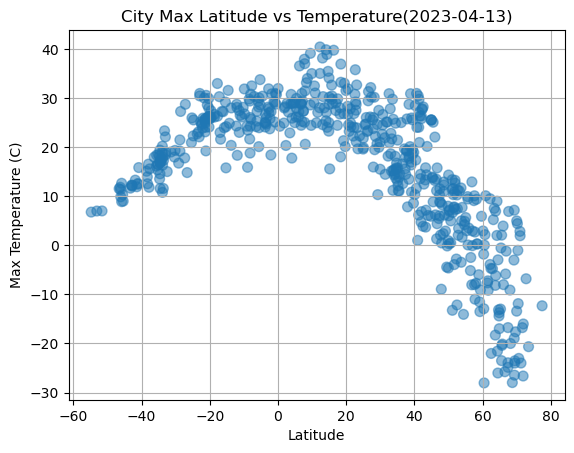

In [12]:
# Build scatter plot for latitude vs. temperature

latitude_vs_temp_plot = city_data_df.plot.scatter(x='Lat',grid= True, y='Max Temp',marker='o',linestyle='',
                                                  s = 50,alpha = 0.5 ,
                                                  title = "City Max Latitude vs Temperature("+ max_record + ")")
latitude_vs_temp_plot.set_xlabel("Latitude")
latitude_vs_temp_plot.set_ylabel("Max Temperature (C)")

# Save the figure
plt.savefig("Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

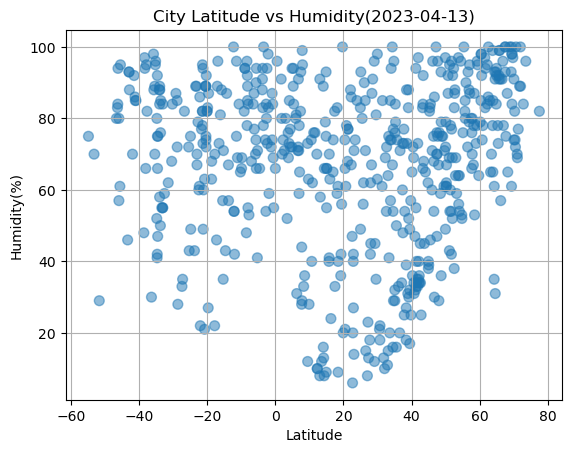

In [13]:
# Build the scatter plots for latitude vs. humidity

latitude_vs_humid_plot = city_data_df.plot.scatter(x='Lat',grid= True, y='Humidity',marker='o',linestyle='',
                                                  s = 50,alpha = 0.5 ,
                                                  title = "City Latitude vs Humidity("+ max_record + ")")
latitude_vs_humid_plot.set_xlabel("Latitude")
latitude_vs_humid_plot.set_ylabel("Humidity(%)")

# Save the figure
plt.savefig("Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

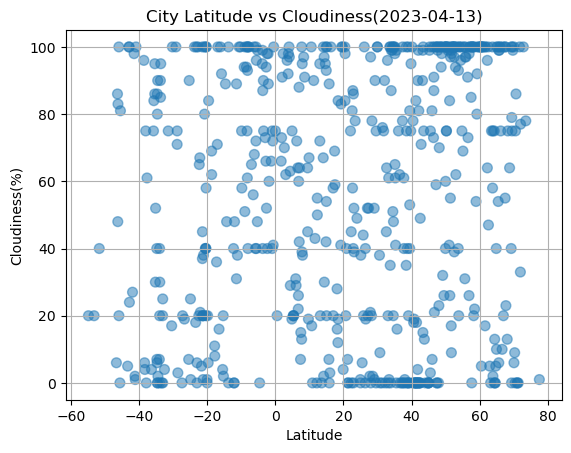

In [14]:
# Build the scatter plots for latitude vs. cloudiness
latitude_vs_cloud_plot = city_data_df.plot.scatter(x='Lat',grid= True, y='Cloudiness',marker='o',linestyle='',
                                                  s = 50,alpha = 0.5 ,
                                                  title = "City Latitude vs Cloudiness("+ max_record + ")")
latitude_vs_cloud_plot.set_xlabel("Latitude")
latitude_vs_cloud_plot.set_ylabel("Cloudiness(%)")

# Save the figure
plt.savefig("Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

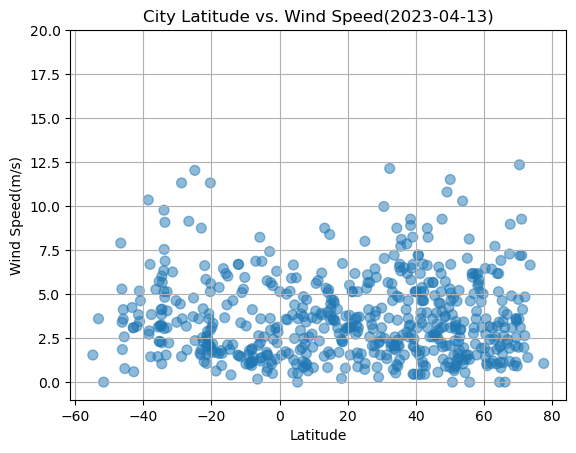

In [15]:
# Build the scatter plots for latitude vs. wind speed
latitude_vs_wind_plot = city_data_df.plot.scatter(x='Lat',grid= True, y='Wind Speed',marker='o',linestyle='',
                                                  s = 50,alpha = 0.5 ,ylim = (-1,20),
                                                  title = "City Latitude vs. Wind Speed("+ max_record + ")")
latitude_vs_wind_plot.set_xlabel("Latitude")
latitude_vs_wind_plot.set_ylabel("Wind Speed(m/s)")

# Save the figure
plt.savefig("Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [16]:
# Define a function to create Linear Regression plots
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_dict.html

def create_linear_regression(x_values, y_values,position_var):
    
    # Perform a linear regression on based on x and y values
    slope, intercept, rvalue, pvalue, stderr = st.linregress(x_values, y_values)

    # Get regression values
    regress_values = x_values * slope + intercept
   
    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    
    plt.plot(x_values,regress_values,"r-")
    print(f"The r-squared is: {rvalue**2}")
     
    plt.text(position_var[0],position_var[1],line_eq,fontsize=15,color="red")
    
    return 



In [17]:
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,amboise,47.4125,0.9827,10.30,76.0,100.0,5.14,FR,1.681404e+09
1,powassan,46.0334,-79.3496,22.09,71.0,7.0,3.94,CA,1.681404e+09
2,bajil,15.0584,43.2851,30.23,55.0,20.0,4.16,YE,1.681404e+09
3,coihaique,-45.5752,-72.0662,10.34,61.0,0.0,2.57,CL,1.681404e+09
4,hermanus,-34.4187,19.2345,17.67,75.0,2.0,5.67,ZA,1.681404e+09


In [18]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,amboise,47.4125,0.9827,10.30,76.0,100.0,5.14,FR,1.681404e+09
1,powassan,46.0334,-79.3496,22.09,71.0,7.0,3.94,CA,1.681404e+09
2,bajil,15.0584,43.2851,30.23,55.0,20.0,4.16,YE,1.681404e+09
6,kodiak,57.7900,-152.4072,2.73,70.0,100.0,1.54,US,1.681404e+09
7,butaritari,3.0707,172.7902,27.19,80.0,62.0,5.16,KI,1.681404e+09


In [19]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,coihaique,-45.5752,-72.0662,10.34,61.0,0.0,2.57,CL,1.681404e+09
4,hermanus,-34.4187,19.2345,17.67,75.0,2.0,5.67,ZA,1.681404e+09
5,busselton,-33.6500,115.3333,11.62,76.0,85.0,9.08,AU,1.681404e+09
8,airai,-8.9266,125.4092,15.93,94.0,51.0,1.02,TL,1.681404e+09
9,taltal,-25.4000,-70.4833,20.96,72.0,7.0,3.72,CL,1.681404e+09


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.7153666779500292


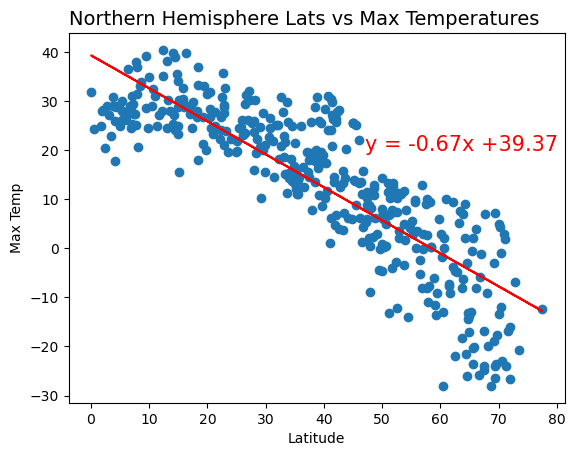

In [20]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plt.scatter(x_values,y_values)
#setting position for line equation display
eq_pos_north = [47,20]
create_linear_regression(x_values,y_values,position_var = eq_pos_north)
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Northern Hemisphere Lats vs Max Temperatures',fontsize=14, color='black', loc='left')

plt.show()


The r-squared is: 0.6592917685641853


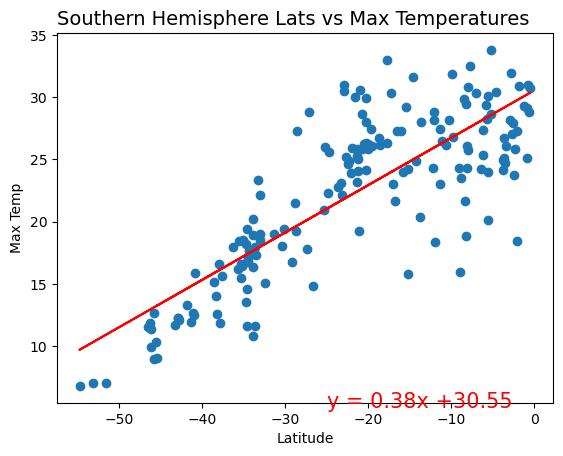

In [21]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plt.scatter(x_values,y_values)
#setting position for line equation display
eq_pos_south = [-25,5]
create_linear_regression(x_values,y_values,position_var = eq_pos_south)
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Southern Hemisphere Lats vs Max Temperatures',fontsize=14, color='black', loc='left')
plt.show()

**Discussion about the linear relationship:** 
- Northern Hemisphere Lats vs Max Temperatures:
  -r-aquared value: 0.7930732781728711
  -line equation: y = -0.63x + 36.35
  
  : Visually it appears that Temperature is negatively correlated(-negative correlation coefficient) with Latitude in the       Northern Hemisphere, meaning, the higher the latitude up North, lower the Temperature.From the r-square value we can       say 79% of this model fits the data.
 

- Southern Hemisphere Lats vs Max Temperatures:
  -r-aquared value: 0.4222283402114606
  -line equation: y = 0.31x + 28.4
  
  : Visually it appears that Temperature is positively correlated(positive correlation coefficient) with Latitude in the       Southern Hemisphere, meaning, the higher the latitude up towards the equator, higher the Temperature.From the r-square     value we can say 42% of this model fits the data. Although the slope appears to be fairly angled, however the               datapoints are far away from the fitted line. Only 162 cities were considered for the Southern Hems in comparison to       404 cities in Northern Hems. Hence r-square may not be significant in this case to determine whether the predictions       are biased.   
  
   

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.09668190766422022
Number of cities in Northern Hemisphere: 397


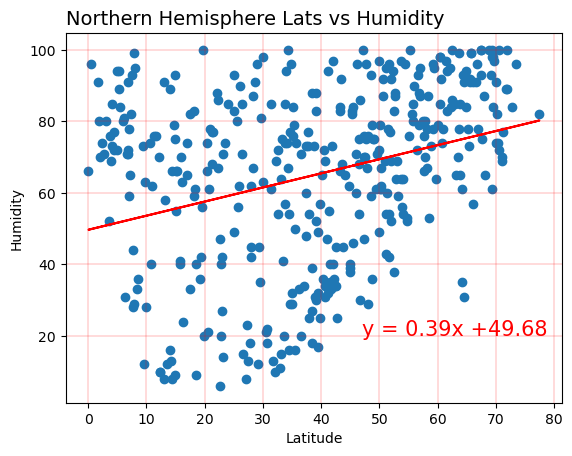

In [22]:
# Northern Hemisphere
num_of_cities_north = len(northern_hemi_df.index)
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plt.scatter(x_values,y_values)
#setting position for line equation display
eq_pos_north = [47,20]
create_linear_regression(x_values,y_values,position_var = eq_pos_north)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Northern Hemisphere Lats vs Humidity',fontsize=14, color='black', loc='left')
plt.grid(color='r', linestyle='-', linewidth=.2)
print("Number of cities in Northern Hemisphere: " + str(num_of_cities_north))
plt.show()

The r-squared is: 0.0019552688828700353
Number of cities in Southern Hemisphere: 175


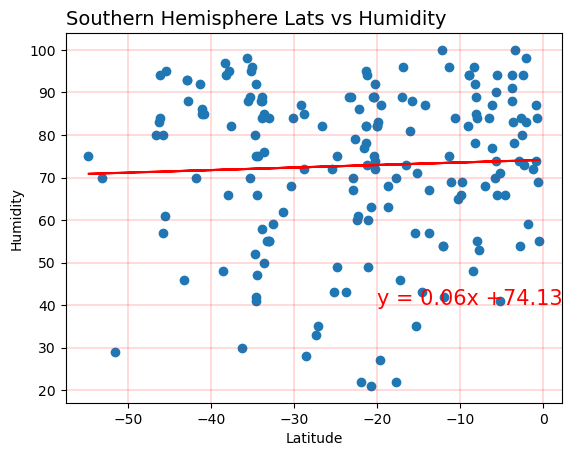

In [23]:
# Southern Hemisphere
num_of_cities_south = len(southern_hemi_df.index)
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plt.scatter(x_values,y_values)
#setting position for line equation display
eq_pos_south = [-20,40]
create_linear_regression(x_values,y_values,position_var = eq_pos_south)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Southern Hemisphere Lats vs Humidity',fontsize=14, color='black', loc='left')
plt.grid(color='r', linestyle='-', linewidth=.2)
print("Number of cities in Southern Hemisphere: " + str(num_of_cities_south))
plt.show()

**Discussion about the linear relationship:** 

- Northern Hemisphere Lats vs Humdity:
  -r-aquared value: 0.08918770084652342
  -line equation: y = 0.34x + 53.58

  : Visually by the slope of the best fit line it appears that Humidity is positively correlated(positive correlation           coefficient) with Latitude in the Northern Hemisphere. However we doubt the linearity of the model with data points         being scattered all over above and below the mean. We can observe as we go up North, there exists cities having both       low and high humidity. From the r-square value says that only 8% of this model fits the data. 
 

- Southern Hemisphere Lats vs Humidity:
  -r-squared value: 0.07336351872492876
  -line equation: y = 0.35x + 83.63
  
  : Visually by the slope of the best fit line it appears that Humidity is positively correlated(positive correlation           coefficient) with Latitude in the Northern Hemisphere. However we doubt the linearity of the model with data points         being scattered all over above and below the mean. We can see closer to the equator, there exists cities having both       low and high humidity.From the r-square value says that only 7% of this model fits the data.  
  


### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.013003144673979138
Number of cities in Northern Hemisphere: 397


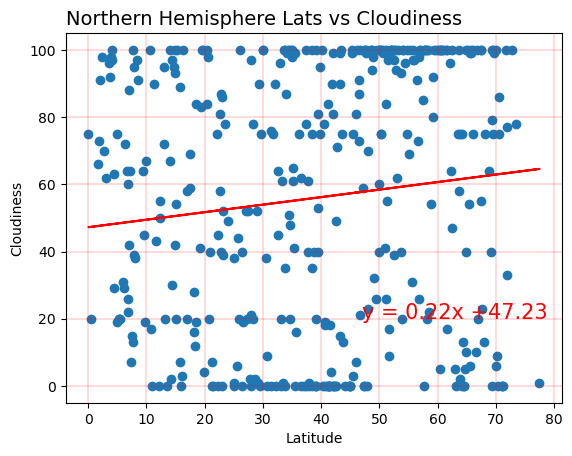

In [24]:
# Northern Hemisphere
num_of_cities_north = len(northern_hemi_df.index)
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plt.scatter(x_values,y_values)
#setting position for line equation display
eq_pos_north = [47,20]
create_linear_regression(x_values,y_values,position_var = eq_pos_north)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Northern Hemisphere Lats vs Cloudiness',fontsize=14, color='black', loc='left')
plt.grid(color='r', linestyle='-', linewidth=.2)
print("Number of cities in Northern Hemisphere: " + str(num_of_cities_north))
plt.show()

The r-squared is: 0.07479096980842571
Number of cities in Southern Hemisphere: 175


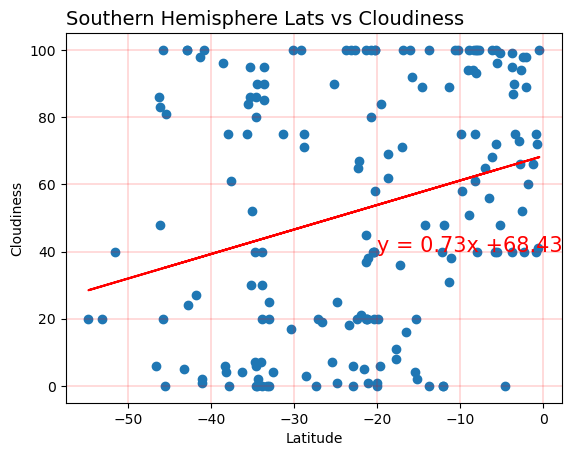

In [25]:
# Southern Hemisphere
num_of_cities_south = len(southern_hemi_df.index)
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plt.scatter(x_values,y_values)
#setting position for line equation display
eq_pos_south = [-20,40]
create_linear_regression(x_values,y_values,position_var = eq_pos_south)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Southern Hemisphere Lats vs Cloudiness',fontsize=14, color='black', loc='left')
plt.grid(color='r', linestyle='-', linewidth=.2)
print("Number of cities in Southern Hemisphere: " + str(num_of_cities_south))
plt.show()

**Discussion about the linear relationship:** 
- Northern Hemisphere Lats vs Cloudiness:
  -r-aquared value: 0.02942041869808908
  -line equation: y = 0.35x + 37.99

  : Visually by the slope of the best fit line it appears that Cloudiness is positively correlated(positive correlation           coefficient) with Latitude in the Northern Hemisphere. However we doubt the linearity of the model with data points         being scattered all over above and below the mean. We can observe as we go up North, there exists cities having both       low and high humidity. From the r-square value says that only 2.9% of this model fits the data. 
 

- Southern Hemisphere Lats vs Cloudiness:
  -r-squared value: 0.08315092201573082
  -line equation: y = 0.85x + 75.49
  
  : Visually by the slope of the best fit line it appears that Cloudiness is positively correlated(positive correlation           coefficient) with Latitude in the Northern Hemisphere. However we doubt the linearity of the model with data points         being scattered all over above and below the mean. We can see closer to the equator, there exists cities having both       low and high humidity.From the r-square value says that only 8.3% of this model fits the data.  

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.0016553500970440873
Number of cities in Northern Hemisphere: 397


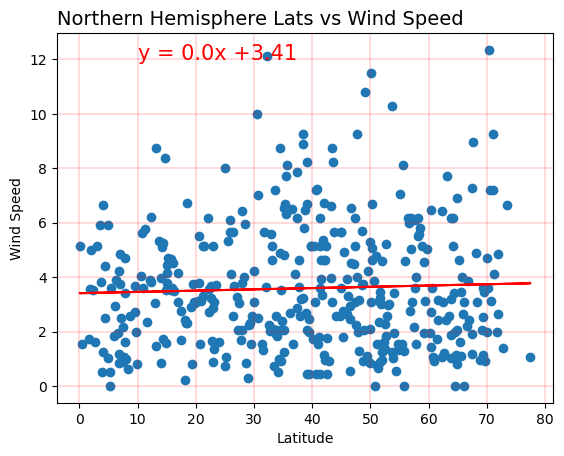

In [26]:
# Northern Hemisphere
num_of_cities_north = len(northern_hemi_df.index)
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plt.scatter(x_values,y_values)
#setting position for line equation display
eq_pos_north = [10,12]
create_linear_regression(x_values,y_values,position_var = eq_pos_north)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Northern Hemisphere Lats vs Wind Speed',fontsize=14, color='black', loc='left')
plt.grid(color='r', linestyle='-', linewidth=.2)
print("Number of cities in Northern Hemisphere: " + str(num_of_cities_north))
plt.show()

The r-squared is: 0.030624088787523384
Number of cities in Southern Hemisphere: 175


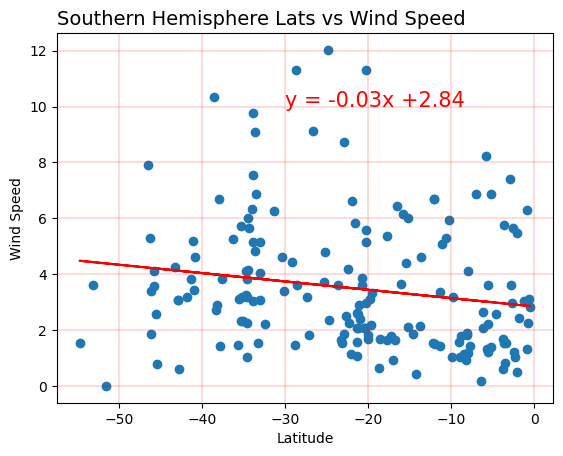

In [27]:
# Southern Hemisphere
num_of_cities_south = len(southern_hemi_df.index)
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plt.scatter(x_values,y_values)
#setting position for line equation display
eq_pos_south = [-30,10]
create_linear_regression(x_values,y_values,position_var = eq_pos_south)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Southern Hemisphere Lats vs Wind Speed',fontsize=14, color='black', loc='left')
plt.grid(color='r', linestyle='-', linewidth=.2)
print("Number of cities in Southern Hemisphere: " + str(num_of_cities_south))
plt.show()

**Discussion about the linear relationship:** 
- Northern Hemisphere Lats vs Wind Speed:
  -r-aquared value: 0.03909896681567728
  -line equation: y = 0.03x + 2.67

  : Visually the slope of the best fit line is fairly flat however from the scatter of the data points being concentrated       towards the bottom of the graph, we can see higher the Latitude in the Northern Hemisphere, there isnt much variation       in Wind Speed.Between 40 to 70 degrees of lats, there exists some cities having peaks of Wind Speed. 
    It appears that Wind Speeds and Lats are not completely correlated. From the r-square value says that only 3.9% of this     model fits the data. 
 

- Southern Hemisphere Lats vs Wind Speed:
  -r-squared value: 0.19173200163352774
  -line equation: y = -0.08x + 1.61
  
  : Visually the slope of the best fit line is fairly flat with a negative slope(negative correlation coefficient).
    Although the r-square value is not signficant enough to explain whether this model fits the data, however, and data         points being concentrated more closer to the x-axis and 0(equator),somewhat signifies closer the cities towards the         equator, there is not much variance or spikes in Wind-Speeds, while the cities that fall closer towards the Poles tends     to have higher wind speeds.  